In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import folium
import os
from pathlib import Path
from shapely import wkt

# set cwd to src
os.chdir('../src')
from utils import *

data_path = Path('../data')

In [25]:
trips_df = pd.read_csv(data_path / 'dest_trips_IrvineSpectrumCenter_2023-01-01_to_2023-01-31.csv')
parking_df = pd.read_csv(data_path / 'IrvineSpectrumCenter_parking.csv')
geometry = parking_df['geometry'].apply(wkt.loads)
parking_gpd = gpd.GeoDataFrame(parking_df, geometry=geometry, crs='EPSG:4326')


In [26]:
display(parking_gpd.head(2))

,pk_lot,time_bucket,f_pct_occ,i_avail,i_occ,location,geometry
0,90391,2023-01-01 08:21:00+00:00,31.333333,356.666667,160.000000,POINT(-117.859470364962 33.6809876250827),"MULTIPOLYGON (((-117.86 33.682, -117.86 33.682..."
1,90391,2023-01-01 08:46:00+00:00,31.333333,357.333333,159.333333,POINT(-117.859470364962 33.6809876250827),"MULTIPOLYGON (((-117.86 33.682, -117.86 33.682..."


<Axes: >

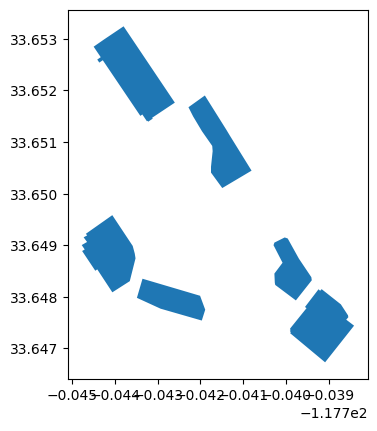

In [27]:
agg_dict = {'location': 'first', 'geometry': 'first', 'f_pct_occ': 'mean',
            'i_avail': 'mean', 'i_occ': 'mean'}
parking_lots_gpd = parking_gpd.groupby('pk_lot').agg(agg_dict).reset_index()
geometry = parking_lots_gpd['geometry']
parking_lots_gpd = gpd.GeoDataFrame(parking_lots_gpd, geometry=geometry, crs='EPSG:4326')

# filter out the airport lots to get just the irvine spectrum center
east = lambda poly: poly.centroid.x > -117.84
parking_lots_gpd['is_irvinge_spectrum'] = parking_lots_gpd['geometry'].apply(east)
parking_lots_gpd = parking_lots_gpd[parking_lots_gpd['is_irvinge_spectrum']]
parking_lots_gpd.plot()

In [ ]:
qk_list = ['023112130', '023112131', '023112132']
m = folium.Map(location=[47.6062, -122.3321], zoom_start=12)
m = add_qks_to_map(m, qk_list)
trips = pd.DataFrame({
    'start_lat': [47.6062, 47.6062],
    'start_lon': [-122.3321, -122.3321],
    'end_lat': [47.6062, 47.6062],
    'end_lon': [-122.3321, -122.3321]
})
m = add_trips_to_map(m, trips)